In [1]:
import pandas as pd
import os 
os.listdir()

['SMSSpamCollection',
 'model.pkl',
 '.ipynb_checkpoints',
 'basic concepts of NLP.ipynb',
 'Spam Classifier.ipynb']

In [2]:
messages = pd.read_csv('SMSSpamCollection',sep = '\t',names=['label','message'])

In [3]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

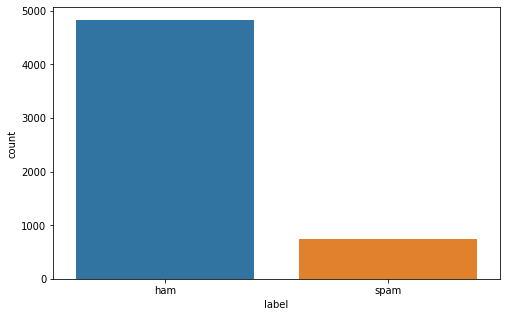

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'label' , data = messages)
plt.xlabel = ('Sms Classfication')
plt.ylabel = ('Count')

In [4]:
#DATA CLEANING anD pREPROCESSING

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [6]:
# bag of words
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [7]:
# cretaing the bag o0 words model

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv =  CountVectorizer(max_features=2500)

In [9]:
X=cv.fit_transform(corpus).toarray()

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:,1].values

In [12]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [13]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [14]:
# Train tests Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 0)

In [15]:
from sklearn.naive_bayes import MultinomialNB
spam_detector  = MultinomialNB()

In [16]:
spam_detector.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
y_pred = spam_detector.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
acuracy = accuracy_score(y_test,y_pred)

In [19]:
acuracy

0.9856502242152466

In [47]:
sample = ['you have won huge amount of money']
sample_message = 'you have won many money'

In [58]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_message = [ps.stem(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = cv.transform([final_message]).toarray()
  return spam_detector.predict(temp)


In [59]:
predict_spam(sample_message)

NotFittedError: Vocabulary not fitted or provided

In [23]:
import pickle

In [24]:
model = pickle.load(open('model.pkl','rb'))